<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Clothing_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [34]:
print(tf.__version__)

2.15.0


In [35]:
#Importing teh dataset
from tensorflow.keras.datasets import fashion_mnist #We willbe using fashion mnist data
fashion_mnist = fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [36]:
#Below is what we mean by the labels as in the mnist fashion dataset

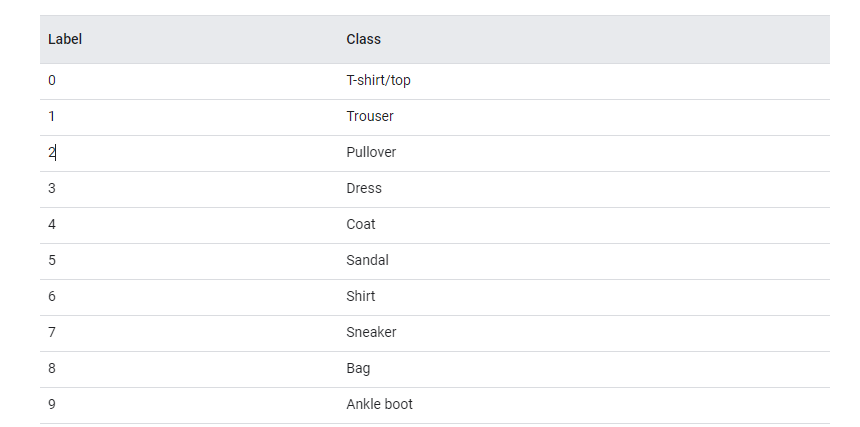

In [37]:
#MAking class names out of the labels above
class_names = ["T_shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Angle boot" ]

#It is always a good activity to explore the dataset! Let us do it

In [38]:
print(f"train images: {train_images.shape}")
print(f"train_labels: {train_labels.shape}")
print(f"test images: {test_images.shape}")
print(f"test_labels: {test_labels.shape}")

train images: (60000, 28, 28)
train_labels: (60000,)
test images: (10000, 28, 28)
test_labels: (10000,)


In [39]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [40]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

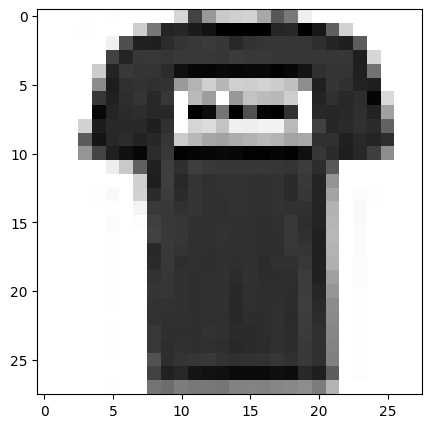

In [41]:
#Lett  us visualize one image
plt.figure(figsize = (8, 5))
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.show()

In [42]:
train_images = train_images/255.0
test_images = test_images/255.0

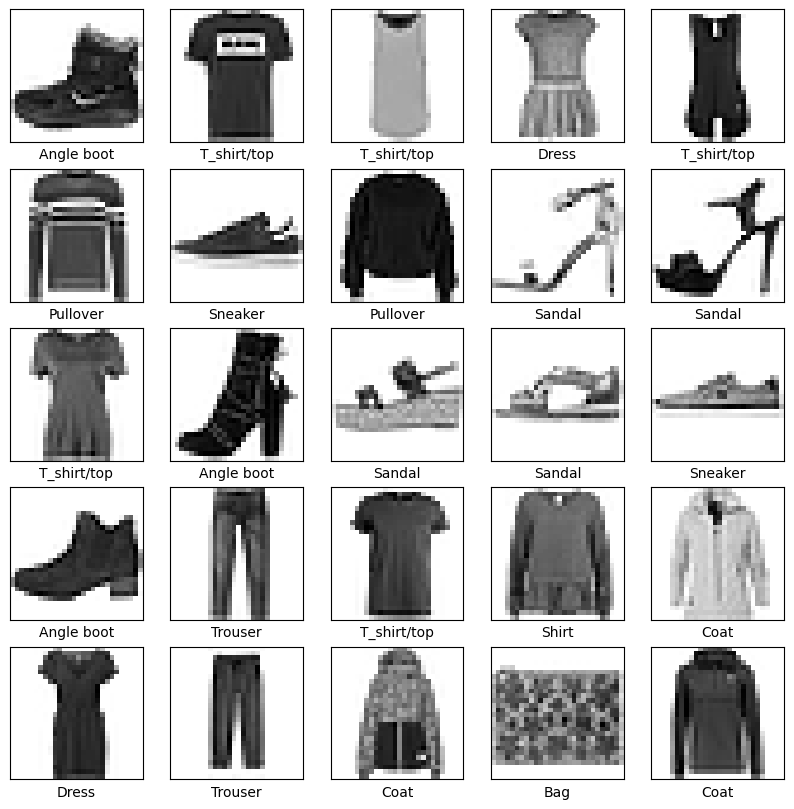

In [43]:
#let us further visualize 25 samples of our train images
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

#Model Building and Development

In [53]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)), tf.keras.layers.Dense(128, activation = "relu"), tf.keras.layers.Dense(10)])

In [57]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

#Model Training

In [58]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4998 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3743 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3385 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3150 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2969 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2829 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2697 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2575 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2472 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 

#Evaluate accuracy
##Next, compare how the model performs on the test dataset:

In [60]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print(f"Test loss = : {test_loss}")
print(f"Test accuracy = : {test_accuracy}")

313/313 - 1s - loss: 0.3265 - accuracy: 0.8867 - 1s/epoch - 4ms/step
Test loss = : 0.32651248574256897
Test accuracy = : 0.8866999745368958


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:

Demonstrate overfitting
Strategies to prevent overfitting

In [61]:
#Let us make predictions with our model now
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [63]:
predictions = probability_model.predict(test_images)
print(predictions)

313/313 [==============================] - 1s 3ms/step
[[3.9681861e-08 1.7966517e-10 2.6178029e-08 ... 1.6926941e-02
  4.1065305e-06 9.8287725e-01]
 [3.4516299e-05 5.5761433e-12 9.9867094e-01 ... 9.5291715e-15
  7.0659709e-09 2.2655472e-13]
 [1.9480571e-10 9.9999994e-01 8.6605570e-15 ... 2.1893388e-23
  1.1274310e-15 9.5341243e-18]
 ...
 [1.3896205e-05 5.5713484e-10 9.5851310e-06 ... 4.7225551e-10
  9.9997360e-01 6.8979007e-12]
 [6.1957666e-09 9.9998969e-01 8.0320417e-10 ... 4.9267053e-15
  2.8389532e-11 4.6122287e-10]
 [1.2696161e-06 1.2045367e-09 6.1412038e-08 ... 4.3757373e-04
  5.4322096e-04 3.2008309e-06]]


In [64]:
predictions[0]

array([3.9681861e-08, 1.7966517e-10, 2.6178029e-08, 1.0866261e-09,
       5.0246449e-08, 1.9113538e-04, 4.5957037e-07, 1.6926941e-02,
       4.1065305e-06, 9.8287725e-01], dtype=float32)

In [65]:
np.argmax(predictions[0])

9

In [67]:
test_labels[0]

9